In [2]:
# Importing necessary libraries for data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# read csv files
dataset = pd.read_csv('/kaggle/input/dataset/Dataset.csv')
movie_title = pd.read_csv('/kaggle/input/dataset/Movie_Id_Titles.csv')

# Display first few rows of the datasets


In [6]:
# sample of data
print('dataset :')
print(dataset.head(2))
print('titles :')
print(movie_title.head(2))



dataset :
   user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
titles :
   item_id             title
0        1  Toy Story (1995)
1        2  GoldenEye (1995)


In [7]:
# combine of data by item id
data = pd.merge(dataset,movie_title , on = 'item_id')

In [8]:
# sample of data
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [9]:
# data shape
data.shape

(100003, 5)

In [10]:
# how many users in system
len(data['user_id'].value_counts())

944

In [11]:
# how many movies in system
len(data['title'].unique())

1664

In [12]:
# rating range
max = data['rating'].max()
min = data['rating'].min()
print(f'high rating = {max} , low rating = {min}')

high rating = 5 , low rating = 1


In [13]:
# get rating count
data_rating = dict(data['rating'].value_counts())
data_rating

{4: 34174, 3: 27145, 5: 21203, 2: 11370, 1: 6111}

<Axes: title={'center': 'Rating Count'}>

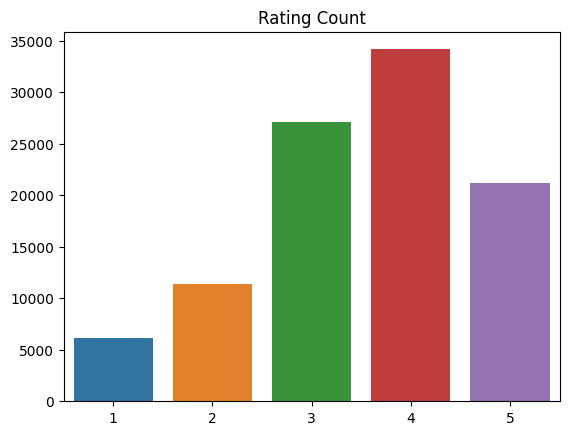

In [14]:
# visualize rating
plt.title('Rating Count')
sns.barplot(x = list(data_rating.keys()), y = list(data_rating.values()))

In [15]:
# get rating average
average_rating = dict()
count_rating = dict()
for title in data['title'].unique():
  average_rating[title] = data[data['title'] == title]['rating'].mean()
  count_rating[title]  = data[data['title'] == title]['rating'].count()
tmp_average = np.zeros((data.shape[0]))
tmp_count  = np.zeros((data.shape[0]))
for idx in range(data.shape[0]):
  tmp_average[idx]  = average_rating[data['title'][idx]]
  tmp_count[idx] = count_rating[data['title'][idx]]
data['average_rating'] = tmp_average
data['count_rating'] = tmp_count
data.head(2)

,user_id,item_id,rating,timestamp,title,average_rating,count_rating
0,0,50,5,881250949,Star Wars (1977),4.359589,584.0
1,290,50,5,880473582,Star Wars (1977),4.359589,584.0


In [16]:

data.drop(columns=['timestamp','user_id'], inplace=True)
sorted_df = data.sort_values(by=['average_rating', 'count_rating'], ascending=False)
print(sorted_df)
sorted_df = sorted_df.drop_duplicates()


       item_id  rating                                         title  \
93875     1189       5                            Prefontaine (1997)   
93876     1189       5                            Prefontaine (1997)   
93877     1189       5                            Prefontaine (1997)   
99244     1293       5                               Star Kid (1997)   
99245     1293       5                               Star Kid (1997)   
...        ...     ...                                           ...   
99982     1325       1                                 August (1996)   
99984     1341       1                               Hedd Wyn (1992)   
99985     1352       1  Shadow of Angels (Schatten der Engel) (1976)   
99994     1626       1    Nobody Loves Me (Keiner liebt mich) (1994)   
99996     1659       1               Getting Away With Murder (1996)   

       average_rating  count_rating  
93875             5.0           3.0  
93876             5.0           3.0  
93877             5.0

In [17]:
print("MOVIE RECOMMENDATIONS")
sorted_df.head()


MOVIE RECOMMENDATIONS


,item_id,rating,title,average_rating,count_rating
93875,1189,5,Prefontaine (1997),5.0,3.0
99244,1293,5,Star Kid (1997),5.0,3.0
96170,1500,5,Santa with Muscles (1996),5.0,2.0
99917,1467,5,"Saint of Fort Washington, The (1993)",5.0,2.0
96402,814,5,"Great Day in Harlem, A (1994)",5.0,1.0
